In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
## gets accuracy of k-nn

def knn_acc(data):
  ## training pipeline
  X_train, X_test, y_train, y_test = train_test_split(data[[0,1]], 
                                                      data['values'], 
                                                      test_size=0.4, 
                                                      random_state=42)
  knn = KNeighborsClassifier()
  
  gs_knn = GridSearchCV(knn, {'n_neighbors': list(range(1, 31))}, cv=10)
  gs_knn.fit(X_train, y=y_train)
  
  ## estimate accuracy
  knn_score = gs_knn.best_estimator_.score(X_test, y_test)
  return knn_score

**Task 1**

  Чтобы логит регрессия работала лучше, чем k-nn, необходимо сделать так, чтобы точки хорошо делились на классы прямой линией, но при этом точки, относящиеся к разным классам должны быть расположены очень близко, чтобы метод ближайших соседей видел среди соседей равное количество и "своих", и "чужих" и путался в них.
  Создадим датасет, в котором будут содержаться точки, находящиеся на 0.5 выше и на 0.5 ниже главной диагонали (проходящей через точку (0,0) под углом 45 градусов) в диапазоне [-2000.5, 1999.5] по оси X. 
  Точки, находящиеся выше главной диагонали отнесем к классу 1, а те, что ниже - к классу 0. Тогда логит регрессия отлично разделит эти точки на классы как раз-таки главной диагональю, а k-NN запутается.

In [0]:
data1 = []
for i in range(-2000, 2000):
  data1.append((i-0.5, i, 1))
  data1.append((i-0.5, i-0.5, 0))
  data1.append((i, i-0.5, 0))
  data1.append((i, i+0.5, 1))

In [155]:
len(data1)

16000

In [156]:
data1 = pd.DataFrame(data1)
data1.head()

,0,1,2
0,-2000.5,-2000.0,1
1,-2000.5,-2000.5,0
2,-2000.0,-2000.5,0
3,-2000.0,-1999.5,1
4,-1999.5,-1999.0,1


In [157]:
data1.tail()

,0,1,2
15995,1998.0,1998.5,1
15996,1998.5,1999.0,1
15997,1998.5,1998.5,0
15998,1999.0,1998.5,0
15999,1999.0,1999.5,1


In [0]:
values1 = []
for i in data1[2]:
  values1.append(i)

Из-за того, что график рисуется маленьким и точки очень близко друг к другу, кажется,  что на нем одна коричневая прямая, но на самом деле их две: сиреневая и желтая.

<Figure size 1440x720 with 0 Axes>

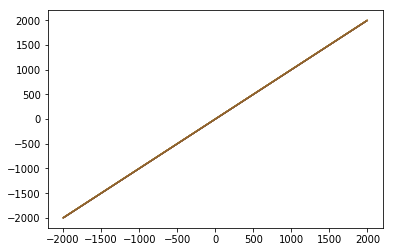

In [159]:
## scatter plot

%matplotlib inline

fig = plt.figure(figsize=(20,10))
fig, ax = plt.subplots()

ax.scatter(data1[0], data1[1], c = values1, s=0.2, alpha=0.2)

In [160]:
data1 = data1.rename(columns={2: "values"})
data1.head()

,0,1,values
0,-2000.5,-2000.0,1
1,-2000.5,-2000.5,0
2,-2000.0,-2000.5,0
3,-2000.0,-1999.5,1
4,-1999.5,-1999.0,1


In [0]:
## gets accuracy of logistic regression

def logreg_acc1(data):
  ## training pipeline
  X_train, X_test, y_train, y_test = train_test_split(data[[0,1]], 
                                                      data['values'], 
                                                      test_size=0.4, 
                                                      random_state=42)
  lr = LogisticRegression()
   
  tuned_parameters = {'C': [1e-1, 1]}
  gs_lr = GridSearchCV(lr, tuned_parameters, cv=10)
  gs_lr.fit(X_train, y=y_train)
  
  ## estimate accuracy
  lr_score = gs_lr.best_estimator_.score(X_test, y_test)
  return lr_score

In [0]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

lr_accuracy = logreg_acc1(data1)

In [0]:
knn_accuracy = knn_acc(data1)

In [164]:
print('Accuracy of Logistic Regression:', lr_accuracy)
print('Accuracy of k-NN:', knn_accuracy)

Accuracy of Logistic Regression: 1.0
Accuracy of k-NN: 0.45484375


Что и требовалось доказать: из-за того, что точки слишком близко k-NN запутался, а логит регрессия прекрасно разделила их диагональю.

**Task 2**

Чтобы метод ближайших соседей сработал лучше логистической регрессии, нужно отнести точки к разным классам так, чтобы их нельзя было хорошо разделить одной прямой линией. Дадим точкам из середины круга значение 1, а точкам дальше середины - значение 0. 

In [0]:
## gets accuracy of logistic regression

def logreg_acc(data):
  ## training pipeline
  X_train, X_test, y_train, y_test = train_test_split(data[[0,1]], 
                                                      data['values'], 
                                                      test_size=0.4, 
                                                      random_state=42)
  lr = LogisticRegression()
   
  tuned_parameters = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
  gs_lr = GridSearchCV(lr, tuned_parameters, cv=10)
  gs_lr.fit(X_train, y=y_train)
  
  ## estimate accuracy
  lr_score = gs_lr.best_estimator_.score(X_test, y_test)
  return lr_score

In [0]:
## создаем датасет, содержащий координаты точек, 
## лежащих на и внутри окружности с радиусом = 500

p = []
for i in range(1, 1002, 10):
  p.append(i)
  
r = []
for i in range(0, 501, 5):
  r.append(i)
  
def rtpairs(r, p):

    for i in range(len(r)):
       for j in range(p[i]):    
        yield r[i], j*(2 * np.pi / p[i])
        
data = []
for i, j in rtpairs(r, p):
  data.append((i * np.cos(j), i * np.sin(j)))

data = pd.DataFrame(data)

In [167]:
data.head()

,0,1
0,0.000000,0.000000
1,5.000000,0.000000
2,4.206268,2.703204
3,2.077075,4.548160
4,-0.711574,4.949107


In [0]:
values = []
for row in data.itertuples():
  if row[1] < 250 and row[1] > -250 and row[2] < 250 and row[2] > -250:
    values.append(1)
  else:
    values.append(0)

In [169]:
len(values)

50601

In [170]:
data2 = data.copy()
data2['values'] = values
data2.head()

,0,1,values
0,0.000000,0.000000,1
1,5.000000,0.000000,1
2,4.206268,2.703204,1
3,2.077075,4.548160,1
4,-0.711574,4.949107,1


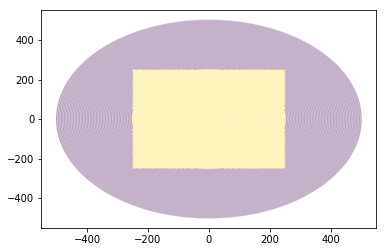

In [171]:
## scatter plot

%matplotlib inline

fig, ax = plt.subplots()

ax.scatter(data2[0], data2[1], c = values, s=0.2, alpha=0.2)

In [0]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

lr_accuracy = logreg_acc(data2)
knn_accuracy = knn_acc(data2)

In [173]:
print('Accuracy of Logistic Regression:', lr_accuracy)
print('Accuracy of k-NN:', knn_accuracy)

Accuracy of Logistic Regression: 0.6794130724766563
Accuracy of k-NN: 0.9962452448001581


Итак, логит регрессия работает гораздо хуже метода ближайших соседей, когда данные невозможно разделить на классы одной прямой.

**Task 3**